The expression **P + a * e**, where **P** is a point, **a** is a scalar (number), and **e** is a unit vector in some direction, indeed gives a point on a line going through **P** in the direction of **e**.

Here's why:

- **Point P**: Consider **P** as a position vector pointing from the origin to the location of **P** in space.
- **Unit Vector e**: A unit vector has a magnitude (length) of 1 and points in a specific direction. It essentially defines the direction of the line.
- **Scalar a**: Multiplying **e** by a scalar **a** scales the vector **e** by **a**. If **a** is positive, the direction of **e** is preserved, but its length is scaled by **a**. If **a** is negative, the direction is reversed, and its magnitude is scaled by the absolute value of **a**.

When you add **a * e** to **P**, you're moving from point **P** in the direction defined by **e**, by a distance proportional to **a**. This operation effectively traces out a line as **a** varies. The line is straight because **e** is constant (it always points in the same direction), and scaling **e** by **a** merely moves you farther or closer in that direction.

So, **P + a * e** describes a line in the direction of **e** passing through **P**. If you vary **a** across all real numbers, you'll trace every point on this line. This is a fundamental concept in vector algebra and geometry, often used to define lines in space.


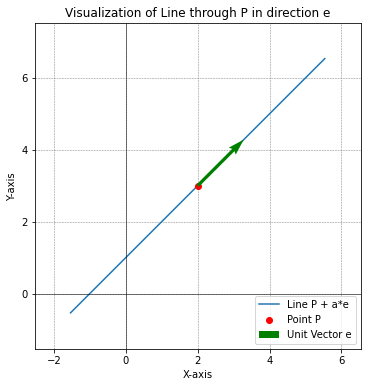

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the point P (e.g., [2, 3] in 2D space)
P = np.array([2, 3])

# Define a unit vector e in some direction (e.g., [1, 1] normalized)
e = np.array([1, 1]) / np.sqrt(2)  # Normalize to make it a unit vector

# Generate several scalar values (a) to show points on the line through P in direction e
a_values = np.linspace(-5, 5, 100)  # 100 points from -5 to 5

# Compute the points on the line P + a * e for all a_values
line_points = [P + a * e for a in a_values]

# Unzip the points to their x and y components for plotting
x_values, y_values = zip(*line_points)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Line P + a*e')  # Plot the line
plt.scatter([P[0]], [P[1]], color='red', zorder=5, label='Point P')  # Mark point P
plt.quiver(*P, *e, scale=5, color='green', zorder=5, width=0.01, label='Unit Vector e')  # Show the direction of e

# Set an equal aspect ratio for the plot
plt.gca().set_aspect('equal', adjustable='box')

plt.xlim(min(x_values) - 1, max(x_values) + 1)
plt.ylim(min(y_values) - 1, max(y_values) + 1)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Visualization of Line through P in direction e')
plt.show()


In the context of PCA, the expression P + a * e can be seen as creating a new variable (the principal component) that is a linear combination of the original variables. Here, P would be the mean of the original variables, e would be the eigenvector (which defines the direction of the maximum variance), and a would be the corresponding eigenvalue (which defines the magnitude of the variance).

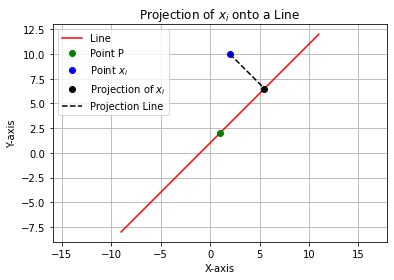

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Function to project x_i onto the line defined by point P and direction vector dir
def project_point_line(x_i, P, dir):
    # Normalize direction vector
    dir_normalized = dir / np.linalg.norm(dir)
    # Calculate vector from P to x_i
    P_to_x_i = x_i - P
    # Calculate the projection's scalar component in the direction of the line
    scalar_projection = np.dot(P_to_x_i, dir_normalized)
    # Calculate the projection point
    projection = P + scalar_projection * dir_normalized
    return projection

# Define the point P, direction vector of the line, and the point x_i
P = np.array([1, 2])
direction = np.array([1, 1])
x_i = np.array([2, 10])

# Calculate the projection of x_i onto the line
projection = project_point_line(x_i, P, direction)

# Visualizing the setup
fig, ax = plt.subplots()

# Plot the line (extending the direction vector both ways from point P)
line_start = P - 10 * direction
line_end = P + 10 * direction
ax.plot([line_start[0], line_end[0]], [line_start[1], line_end[1]], 'r-', label='Line')

# Plot point P
ax.plot(P[0], P[1], 'go', label='Point P')

# Plot the original point x_i
ax.plot(x_i[0], x_i[1], 'bo', label='Point $x_i$')

# Plot the projected point
ax.plot(projection[0], projection[1], 'ko', label='Projection of $x_i$')

# Connect x_i and its projection with a dashed line
ax.plot([x_i[0], projection[0]], [x_i[1], projection[1]], 'k--', label='Projection Line')

# Enhance plot
ax.legend()
ax.axis('equal')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Projection of $x_i$ onto a Line')
plt.grid(True)
plt.show()


In PCA (Principal Component Analysis), the goal is to minimize the sum of squared distances, represented as $\sum || X_i - (\mu + e * a_i) ||^2$, where:
- $X_i$ are the data points,
- $\mu$ is the mean of the data points,
- $e$ represents the principal component (eigenvector),
- $a_i$ denotes the projection of $X_i$ onto $e$.

This minimization process selects the projection that retains the most variance in the data, effectively reducing reconstruction error while preserving essential data characteristics.
